In [ ]:
# !pip install -U fastdup

In [1]:
import fastdup
fastdup.__version__

'0.925'

In [2]:
input_dir = "./food-101/images/"
work_dir = "my-fastdup-workdir"

In [ ]:
fastdup.run(input_dir, work_dir)

In [3]:
fastdup.init_search(10, work_dir, verbose=True, license='your-license-key')


2023-05-01 14:35:51 [INFO] 112) Finished load_index() NN model, num_images 101000
2023-05-01 14:35:51 [INFO] Read nnf index file from my-fastdup-workdir/nnf.index 1
2023-05-01 14:35:51 [INFO] Read NNF index with 101000 images


0

In [4]:
df = fastdup.search("my_apple_pie2.jpg", None, verbose=True)

char vec0 :[222, 234, 236, 222, 234, 236, 222, 234, 236]
char vec672 :[222, 234, 236, 222, 234, 236, 223, 235, 237]
char vec1344 :[223, 235, 237, 223, 235, 237, 223, 235, 237]

Image from python side:
[[222, 234, 236], [222, 234, 236], [222, 234, 236]]
[[222, 234, 236], [222, 234, 236], [223, 235, 237]]
[[223, 235, 237], [223, 235, 237], [223, 235, 237]]


resized 224:
[[222, 234, 236], [222, 234, 236], [222, 234, 236]]
[[222, 234, 236], [222, 234, 236], [223, 235, 237]]
[[223, 235, 237], [223, 235, 237], [223, 235, 237]]


RGB:
[[236, 234, 222], [236, 234, 222], [236, 234, 222]]
[[236, 234, 222], [236, 234, 222], [237, 235, 223]]
[[237, 235, 223], [237, 235, 223], [237, 235, 223]]

0 :[236.0000, 234.0000, 222.0000, 236.0000, 234.0000, 222.0000, 236.0000, 234.0000, 222.0000, 237.0000]
2023-05-01 14:35:53 [DEBUG] Inner inference took 6 (test? 0)
output_tensor0 :[1.4992, 0.2995, -0.0762, 1.0952, 0.0231, 0.2423, 0.0349, 2.2856, 0.2712, 1.1774]
output_tensor_end0 :[0.5141, -0.0602, 0.4611,

In [5]:
fastdup.create_duplicates_gallery(df, ".",input_dir=input_dir)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 136.04it/s]


Stored similarity visual view in  ./duplicates.html


0


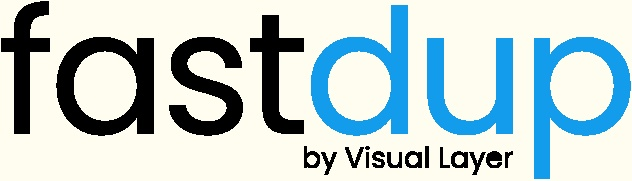
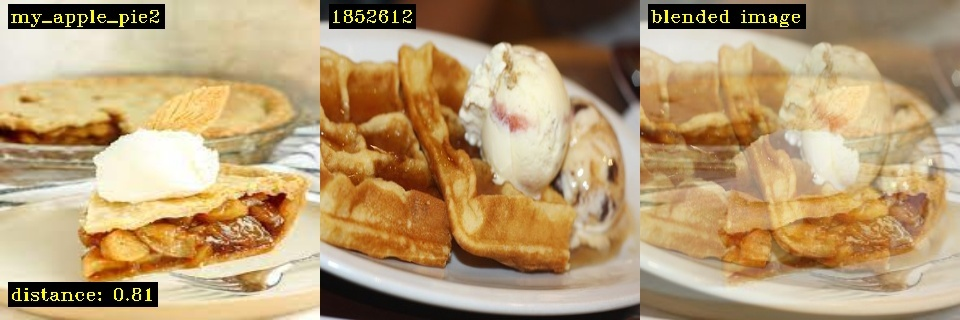
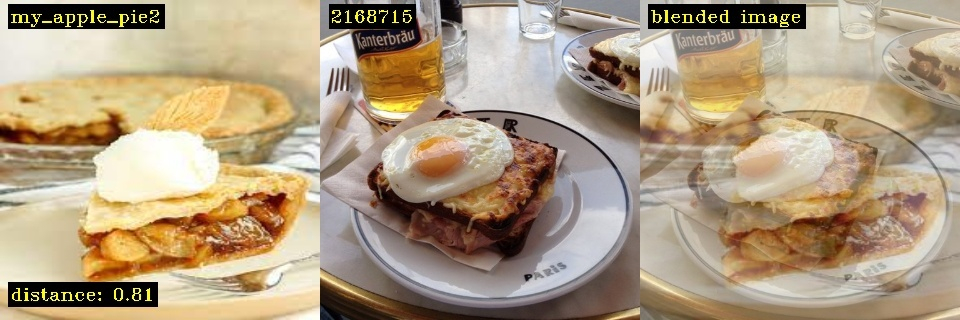
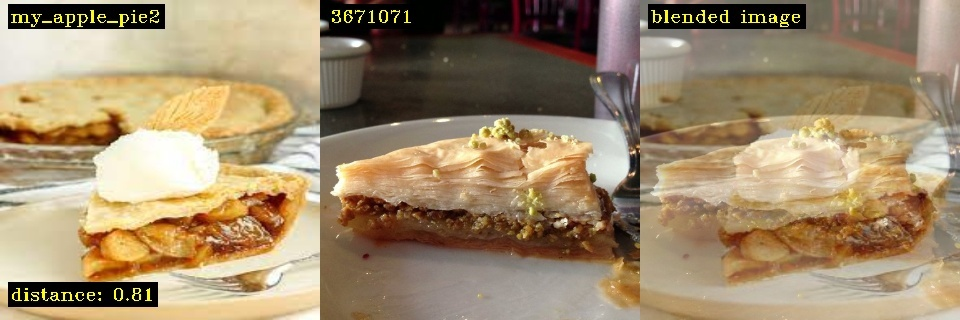
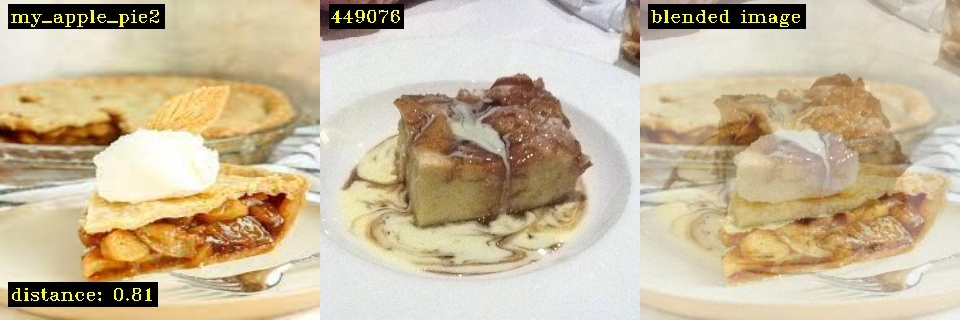
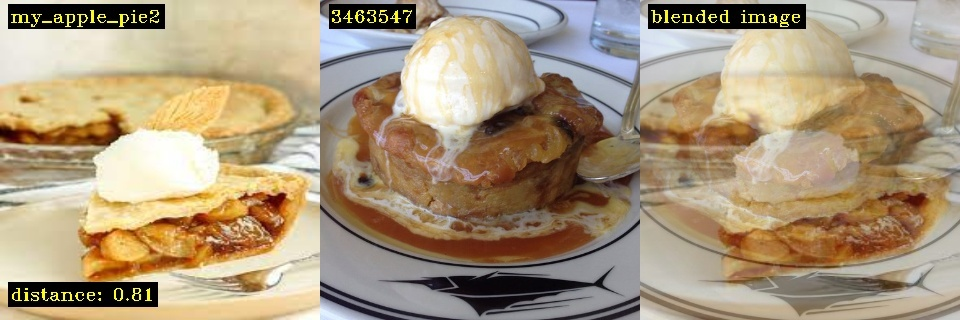
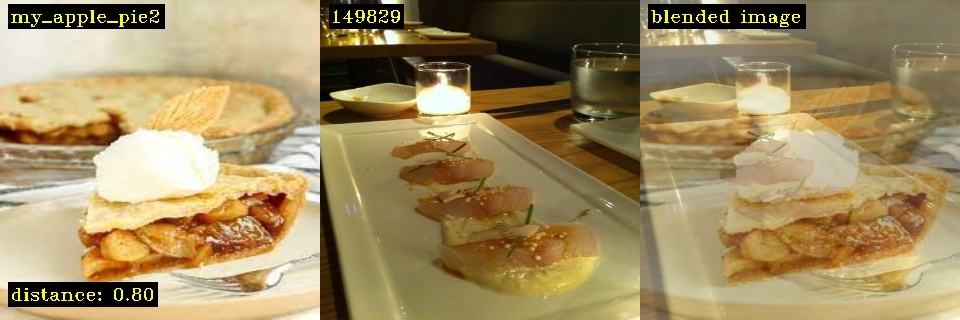
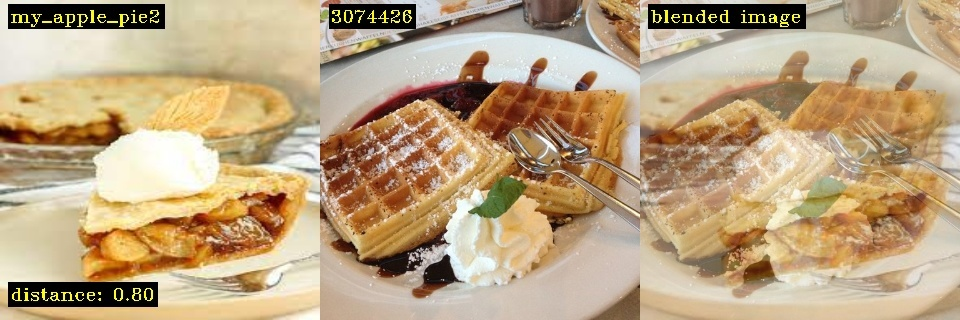
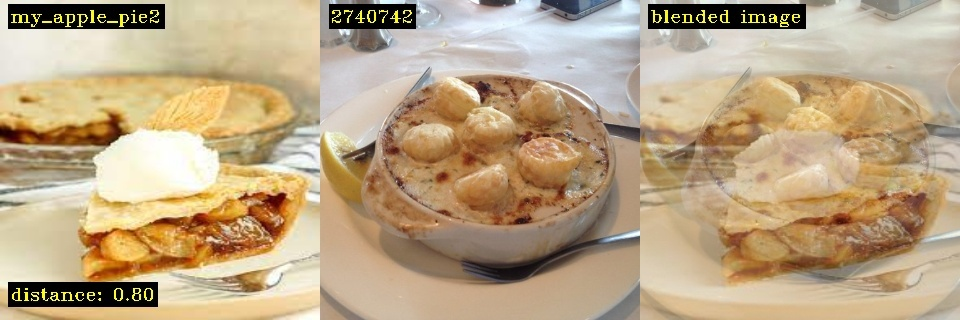
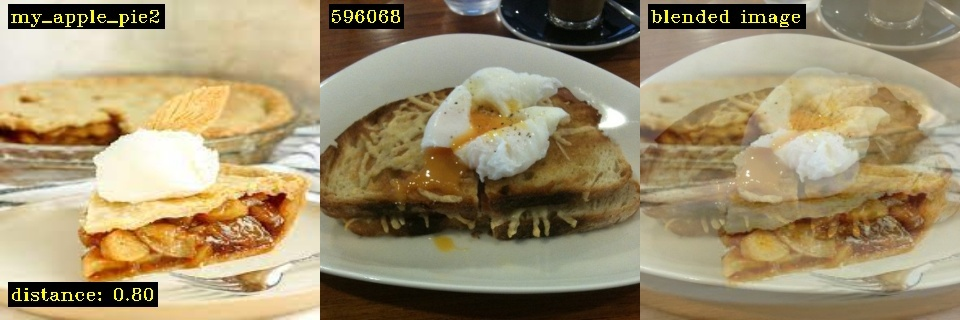
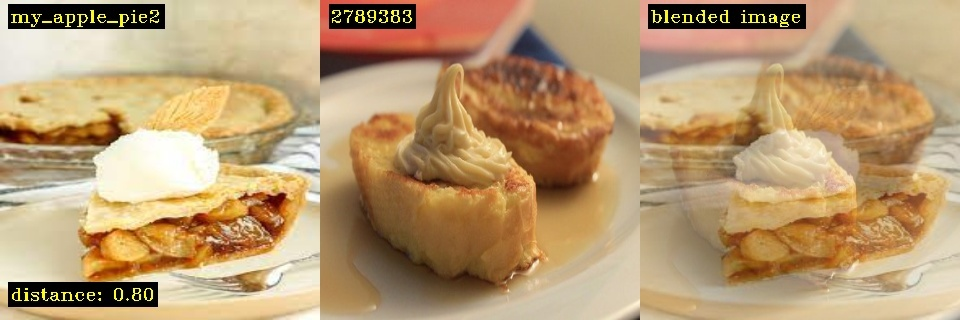

In [7]:
from IPython.display import HTML
HTML(filename="duplicates.html")

In [6]:
fastdup.create_similarity_gallery(df, ".",input_dir=input_dir, min_items=3)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.37it/s]

Stored similar images visual view in  ./similarity.html


,from,to,distance
0,my_apple_pie2.jpg,"[food-101/images/french_toast/2789383.jpg, food-101/images/croque_madame/596068.jpg, food-101/images/escargots/2740742.jpg, food-101/images/waffles/3074426.jpg, food-101/images/ceviche/149829.jpg, food-101/images/bread_pudding/3463547.jpg, food-101/images/bread_pudding/449076.jpg, food-101/images/baklava/3671071.jpg, food-101/images/croque_madame/2168715.jpg, food-101/images/waffles/1852612.jpg]","[0.798576, 0.798768, 0.800533, 0.801059, 0.802614, 0.8065, 0.807464, 0.807754, 0.807826, 0.808035]"



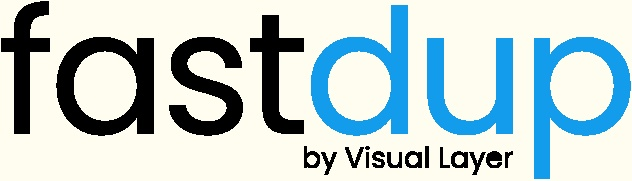
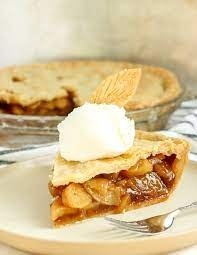
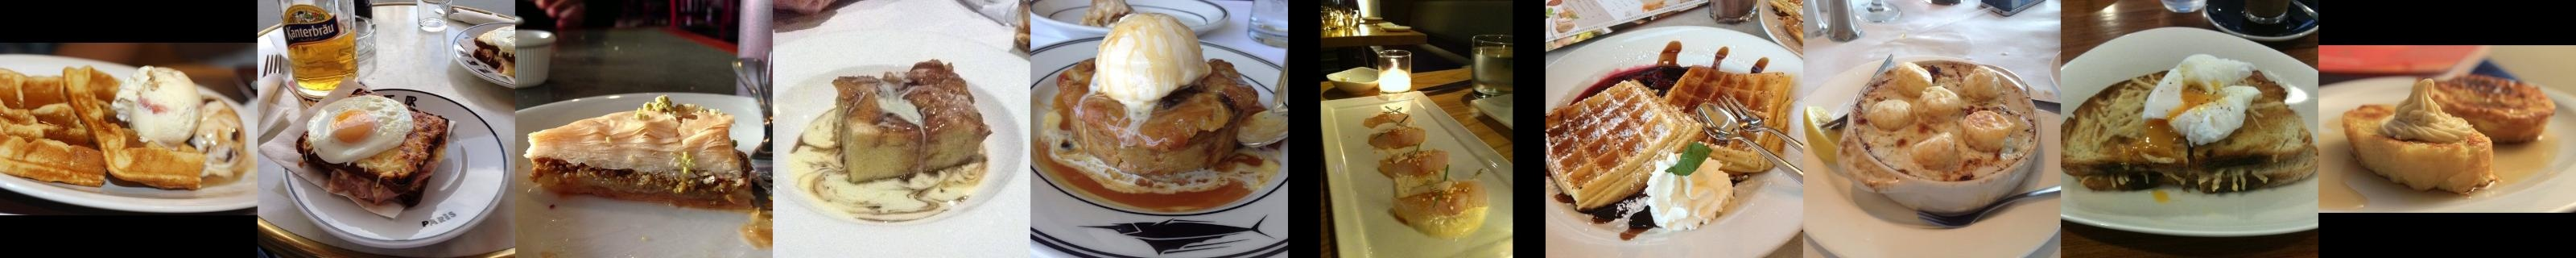

In [8]:
HTML(filename="similarity.html")